In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , f1_score , recall_score, precision_score

from sklearn.ensemble import RandomForestClassifier

# Loading Data 

In [121]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('gender_submission.csv')
visual = pd.read_csv('train.csv')

# EDA train Data

In [122]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [123]:
df_train.shape

(891, 12)

In [124]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [126]:
df_train.duplicated().sum() # searching for duplicates

0

In [127]:
df_train.drop('Ticket',axis=1 , inplace=True)
df_train.drop('Name',axis=1 , inplace=True)
df_train.drop('PassengerId',axis=1 , inplace=True)
df_train.drop('Cabin',axis=1 , inplace=True)

In [128]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [129]:
# checking the skewness
df_train[['Age']].skew()

## Skewness Value	Shape
# ≈ 0	Symmetric (Normal)
# > 0	Right Skew (Positive)
# < 0	Left Skew (Negative)

Age    0.389108
dtype: float64

In [130]:
# fillinf nan or Null values
df_train['Age'].fillna(np.median(df_train['Age'].dropna()), inplace= True)
df_train.dropna(subset=['Embarked'], inplace=True)

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_9620\2156067585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(np.median(df_train['Age'].dropna()), inplace= True)


In [131]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [132]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [133]:
# Encoding columns / features

In [134]:
pd.get_dummies(df_train['Sex'])
df_train['Sex'] = df_train['Sex'].map({'male':1 , 'female':0})

In [135]:
pd.get_dummies(df_train['Embarked'])
df_train['Embarked'] = df_train['Embarked'].map({'S':1 , 'C':2 , 'Q':3})

In [136]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,28.0,0,0,8.4583,3
6,0,1,1,54.0,0,0,51.8625,1
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,2


# EDA test Data

In [137]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [138]:
df_test.shape

(418, 11)

In [139]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [140]:
df_test.duplicated().sum() # searching duplicates

0

In [141]:
df_test.drop('Ticket',axis=1 , inplace=True)
df_test.drop('Name',axis=1 , inplace=True)
df_test.drop('Cabin',axis=1 , inplace=True)

In [143]:
df_test['Fare'].fillna(np.median(df_train['Fare'].dropna()), inplace= True)

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_9620\1858033373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(np.median(df_train['Fare'].dropna()), inplace= True)


In [144]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [145]:
# checking the skewness
df_test[['Age']].skew()

## Skewness Value	Shape
# ≈ 0	Symmetric (Normal)
# > 0	Right Skew (Positive)
# < 0	Left Skew (Negative)

Age    0.457361
dtype: float64

In [146]:
# fillinf nan or Null values
df_test['Age'].fillna(np.median(df_test['Age'].dropna()), inplace= True)

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_9620\957757729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(np.median(df_test['Age'].dropna()), inplace= True)


In [147]:
df_test.isnull().sum()  # check for null / Nan value

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [148]:
# Encoding Features or columns: 

In [149]:
pd.get_dummies(df_test['Sex'])
df_test['Sex'] = df_test['Sex'].map({'male':1 , 'female':0})

In [150]:
pd.get_dummies(df_test['Embarked'])
df_test['Embarked'] = df_test['Embarked'].map({'S':1 , 'C':2 , 'Q':3})

In [151]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1
5,897,3,1,14.0,0,0,9.2250,1
6,898,3,0,30.0,0,0,7.6292,3
7,899,2,1,26.0,1,1,29.0000,1
8,900,3,0,18.0,0,0,7.2292,2
9,901,3,1,21.0,2,0,24.1500,1


# Visual Analysing on train data

In [32]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,28.0,0,0,8.4583,3
6,0,1,1,54.0,0,0,51.8625,1
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,2


In [33]:
df_train['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

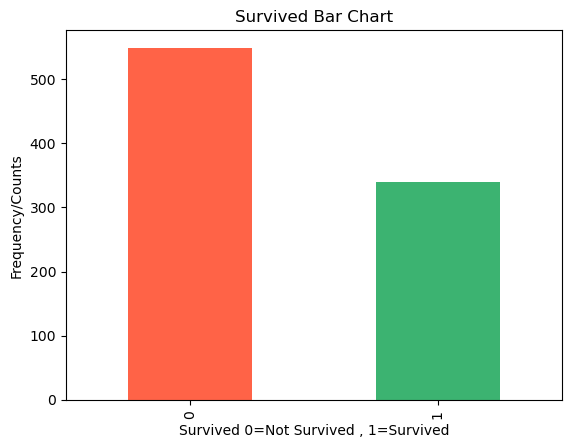

In [34]:
df_train['Survived'].value_counts().plot(kind='bar', color = ['tomato','mediumseagreen'])
plt.title('Survived Bar Chart')
plt.xlabel('Survived 0=Not Survived , 1=Survived')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription:
1. The above grapht shows that people survived are less then people didnt survived in disaster.
2. survived < Not survived
3. not survivied => 549 ,  survived => 340

In [35]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

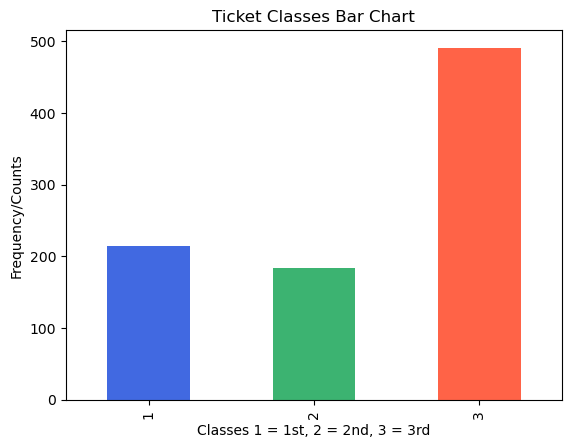

In [36]:
df_train['Pclass'].value_counts().sort_index().plot(kind= 'bar', color = ['royalblue', 'mediumseagreen', 'tomato'])
plt.title('Ticket Classes Bar Chart')
plt.xlabel('Classes 1 = 1st, 2 = 2nd, 3 = 3rd')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription :
1. Maximum people baught third class tickets or Royal class then lower class  and after then middle class
2. 1 > 2  < 3
3. Think so that rich people and familise are more on the titanic then other two classes

In [37]:
survival_by_class = pd.crosstab(df_train['Pclass'], df_train['Survived'])

In [38]:
survival_by_class

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


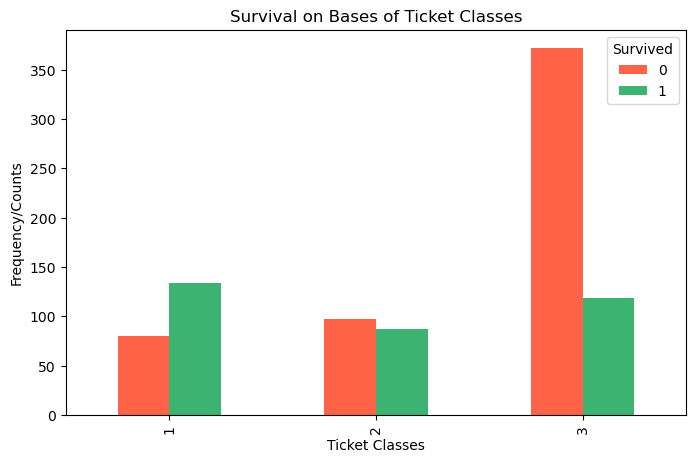

In [39]:
survival_by_class.plot(kind='bar', 
                       stacked=False, 
                       color=['tomato', 'mediumseagreen'], 
                       figsize=(8, 5))
plt.title('Survival on Bases of Ticket Classes')
plt.xlabel('Ticket Classes')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription: 
1. It shows that people of 3rd class tickets were not suvived then other both classes
2. In 1st class the survived are more then non survived 
3. less life loss to the 1st and second class as compared to third class 

In [40]:
gender_by_class = pd.crosstab(df_train['Pclass'], df_train['Sex'])

In [41]:
gender_by_class

Sex,0,1
Pclass,,
1,92,122
2,76,108
3,144,347


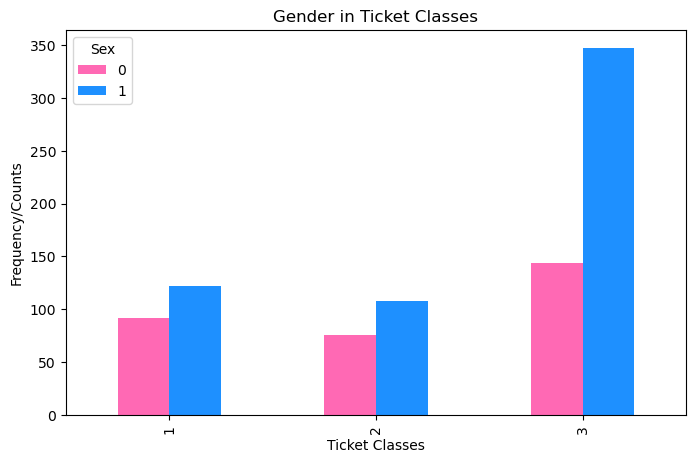

In [42]:
gender_by_class.plot(kind='bar', 
                       stacked=False, 
                       color=['hotpink', 'dodgerblue'], 
                       figsize=(8, 5))
plt.title('Gender in Ticket Classes')
plt.xlabel('Ticket Classes')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription : 
1. This graph show the  male are far more in third class then females in every aspect
2. in both 1st and 2nd class the ratio is average that number are not similar but dont such affect 3rd did.

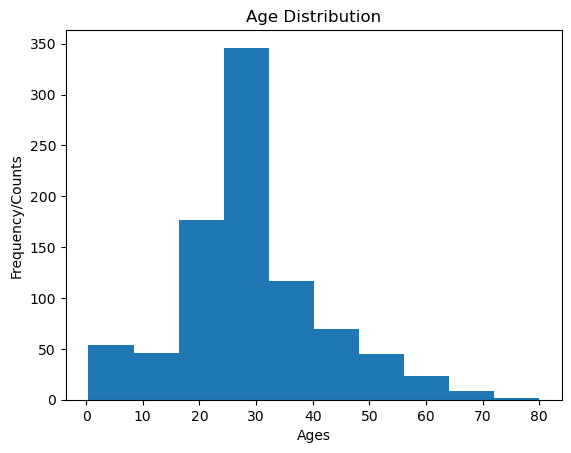

In [43]:
df_train['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription :
The graph is right skweed unimodel graph ,range of 80 , mean > median 

In [44]:
df_train['Age'].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Hence proved mean is greater then median!

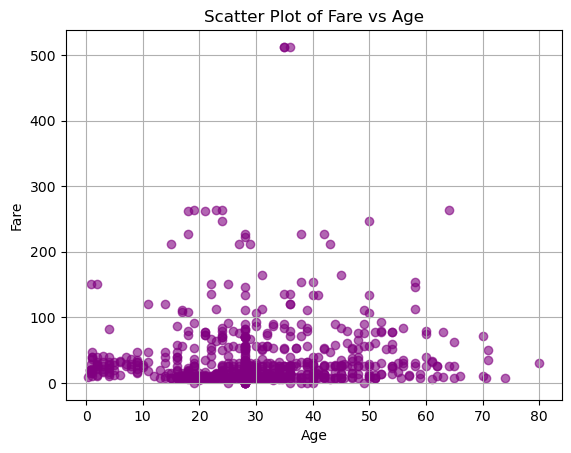

In [45]:
plt.scatter(df_train['Age'], df_train['Fare'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

In [46]:
df_train['Embarked'].value_counts()

Embarked
1    644
2    168
3     77
Name: count, dtype: int64

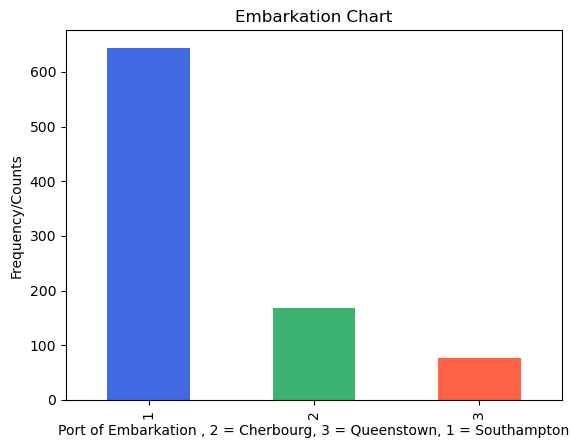

In [47]:
df_train['Embarked'].value_counts().plot(kind='bar',color =['royalblue', 'mediumseagreen', 'tomato'])
plt.title('Embarkation Chart')
plt.xlabel('Port of Embarkation , 2 = Cherbourg, 3 = Queenstown, 1 = Southampton')
plt.ylabel('Frequency/Counts')
plt.show()

### Discription : 
1. highest onboarding of titanic was happened in Southampton then Cherbourg and at least on Queenstown

# Machine Learning Model

In [48]:
# spliting train data in to target and features
X = df_train.drop("Survived", axis=1)
y = df_train['Survived']

# splitting data into train and test
X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,test_size=0.2,random_state=42)

In [49]:
rfc = RandomForestClassifier()
model = rfc.fit(X_train,y_train)

In [50]:
model.score(X_test,y_test)

0.7640449438202247

In [51]:
# predicting y on bases of X_test
y_pred = model.predict(X_test)

In [52]:
accuracy_score(y_pred,y_test)

0.7640449438202247

## Feature Importance

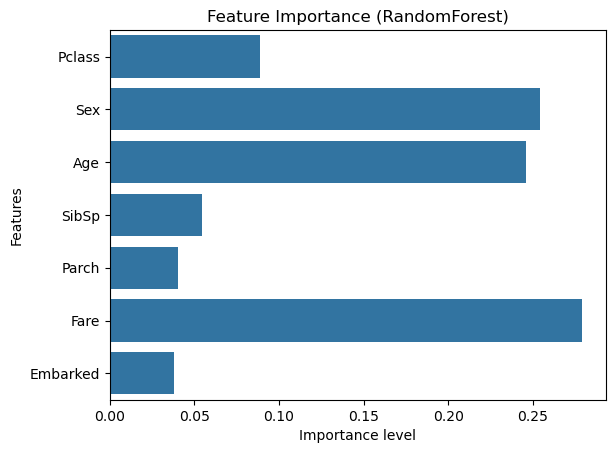

In [53]:
importances = rfc.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (RandomForest)')
plt.ylabel('Features')
plt.xlabel('Importance level')
plt.show()

In [55]:
# tuning the model by hyper parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]               # Whether bootstrap samples are used
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid , cv=5, scoring='accuracy', n_jobs=1, verbose=2)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [56]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [57]:
# Evaluate best model on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [59]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Tuned Validation Accuracy: {accuracy_best:.6f}')

Tuned Validation Accuracy: 0.780899


# Applying on Full Train set

In [152]:
# splitting data into target and features
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

total_model = rfc.fit(X_train , y_train)

In [153]:
# predicting of test set 
y_test = df_test.drop('PassengerId', axis=1)
y_pred = rfc.predict(y_test)

In [154]:
df_sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [155]:
result = df_test

In [156]:
result

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,1
414,1306,1,0,39.0,0,0,108.9000,2
415,1307,3,1,38.5,0,0,7.2500,1
416,1308,3,1,27.0,0,0,8.0500,1


In [157]:
result.drop('Pclass', axis=1 ,inplace=True)
result.drop('Sex', axis=1 ,inplace=True)
result.drop('Age', axis=1 ,inplace=True)
result.drop('SibSp', axis=1 ,inplace=True)
result.drop('Parch', axis=1 ,inplace=True)
result.drop('Fare', axis=1 ,inplace=True)
result.drop('Embarked', axis=1 ,inplace=True)

In [158]:
result['Survived'] = y_pred

In [159]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [160]:
result.to_csv('Submission.csv',index=False)